## Theme
- How to implement the model f{w,b} for linear regression with one variable

## Notation
Here is a summary of some of the notation you will encounter.
$a$ - scalar, non bold (скалярное значение, без жирного начертания)
$\mathbf{a}$ - vector, bold (вектор)
$\mathbf{x}$ - Training Example feature values (in this lab - Size (1000 sqft))#x_train
$\mathbf{y}$ - Training Example  targets (in this lab Price (1000s of dollars)) #y_train
$x^{(i)}$, $y^{(i)}$  - I.th Train example #x_i, y_i
m - numbers of training examples #m
$w$ - weight - вес #w
$b$ - parameter: bias - смещение #b
$f_{w,b}(x^{(i)})$ - the result of the model evaluation at x(i) parametrs(w,b)
$f_{w,b}(x^{(i)}) = wx^{(i)}+b$
#f_wb результат оценки модели


NumPy, a popular library for scientific computing(вычисления)
Matplotlib, a popular library for plotting data(визуализация)

In [4]:
import numpy as np #импортирует библиотеку NumPy и дает ей псевдоним np
import matplotlib.pyplot as plt #импортирует подмодуль pyplot из  Matplotlib c ником plt.

In [5]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0]) #создаем np массив который содержит 2 числа(входные данные)
y_train = np.array([300.0, 500.0]) #создаем np массив еще 2 чилса(выходные данные)
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


Use m для обозначения кол-ва обучающих примеров. В массивах NumPy есть параметр .shape. Вызов x_train.shape возвращает кортеж Python с записью для каждого измерения. x_train.shape[0] - это длина массива и количество примеров, как показано ниже.


In [6]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
# В данном случае, так как x_train - это одномерный массив, форма будет представлять кортеж с одним значением, которое будет равно длине массива (количество элементов).
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


One can also use the Python `len()` function as shown below.

In [8]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example. Для доступа к значению в массиве NumPy используется индексирование массива с нужным смещением.

In [13]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i] #cheking example i
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


Plotting the data (построение данных(графиков))
You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below.
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

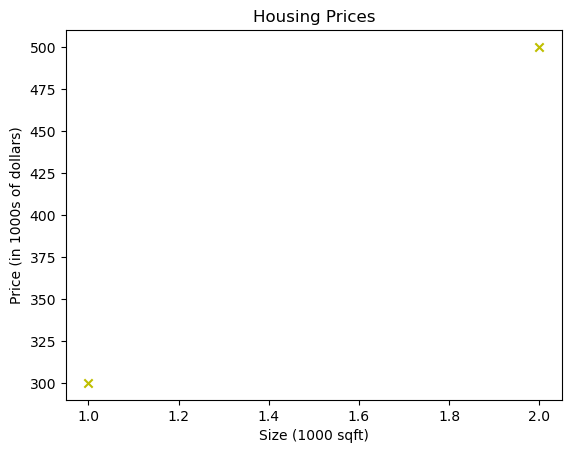

In [18]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='y')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

" > As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.
Формула выше представляет, как можно представить прямые линии - разные значения w и b дают вам разные прямые линии на графике.
Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.
**Note: You can come back to this cell to adjust the model's w and b parameters**

In [26]:
#значения параметров графика
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - считаем значение функции для наших точек

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
Для большого числа точек данных это может стать неудобным и повторяющимся. Вместо этого вы можете вычислить вывод функции в цикле for, как показано в функции compute_model_output ниже.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.
> Описание аргумента (ndarray (m,)) описывает Numpy n-мерный массив формы (m,). (scalar) описывает аргумент без размерности, только магнитуду.
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries
Примечание: np.zero(n) вернет одномерный массив NumPy с $n$ записями.

In [27]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Вычисляет предсказание линейной модели.
    Args:
      x (ndarray (m,)): Data, m examples - набор данных(одномерный массив)
      w,b (scalar)    : model parameters - параметры(вес и свободный член)
    Returns
      f_wb (ndarray (m,)): model prediction - возвращает предикшн
    """
    m = x.shape[0]#(кол-во данных что зашло)
    f_wb = np.zeros(m) #создание массива нулей длинны m(тут храним предсказанияя)
    for i in range(m):
        #Для каждого индекса i, мы вычисляем предсказание модели, используя формулу линейной модели f_wb = wx + b, где w - вес, x[i] - размер дома для данного примера, и b - свободный член.
        f_wb[i] = w * x[i] + b
    return f_wb #возвращает массив предсказаний

Now let's call the `compute_model_output` function and plot the output..

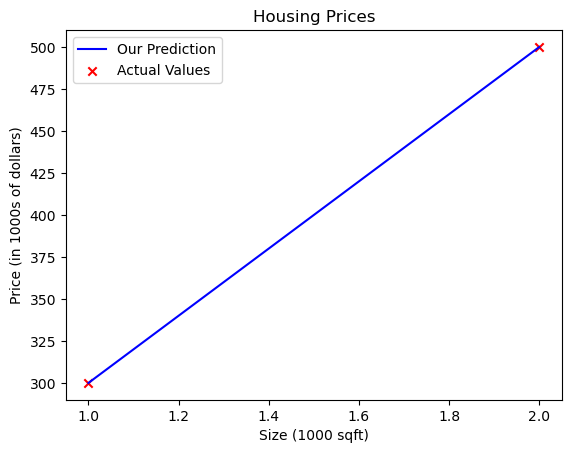

In [28]:
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')#цвет линии c =

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')#действительны значения

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


Как видите, установка $w = 200$ и $b = 100$  приводит к тому, чтобы линия соответствовала нашим данным.
NICE
Теперь, когда у нас есть модель, мы можем использовать ее для   прогноза. Давайте предскажем цену дома площадью 1200 квадратных футов. Поскольку единицы измерения 𝑥 находятся в тысячах квадратных футов, 𝑥 равно 1.2.







In [29]:
w = 200
b = 100
x_i = 1.2 #1200 dollars
cost_1200sqft = w * x_i + b

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


Поздравляю!
На этой лабораторной работе вы узнали:

1) Линейная регрессия строит модель, которая устанавливает связь между признаками и целями (целевыми значениями).
В приведенном выше примере признаком была площадь дома, а целью - цена дома.
2) Для простой линейной регрессии модель имеет два параметра 𝑤 и 𝑏, значения которых "подгоняются" с использованием обучающих данных.
3) Как только параметры модели были определены, модель можно использовать для создания прогнозов на новых данных.

Вы проделали отличную работу, понимая эти концепции!